In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils import *

In [2]:
data = pd.read_csv('./data/MI_timesteps.txt',sep=' ', skiprows=range(1,1001))
data

,timeStep,areaDensityCounting-PID5,areaDensityCounting-PID6,areaDensityCounting-PID7,areaDensityCounting-PID8,areaDensityCounting-PID9,areaDensityCounting-PID10,areaDensityCounting-PID11,areaDensityCounting-PID12,areaDensityCounting-PID13
0,1001,0,2,97,7,0,0,5,1,43
1,1002,0,2,96,7,0,0,5,1,45
2,1003,0,2,95,6,0,0,5,0,46
3,1004,0,2,94,6,0,0,4,1,46
4,1005,0,2,92,6,0,0,5,0,46
...,...,...,...,...,...,...,...,...,...,...
13996,14997,0,10,95,4,0,0,2,1,39
13997,14998,0,10,94,3,0,0,3,1,39
13998,14999,0,10,93,3,0,1,2,1,40
13999,15000,0,10,93,3,0,1,3,1,41


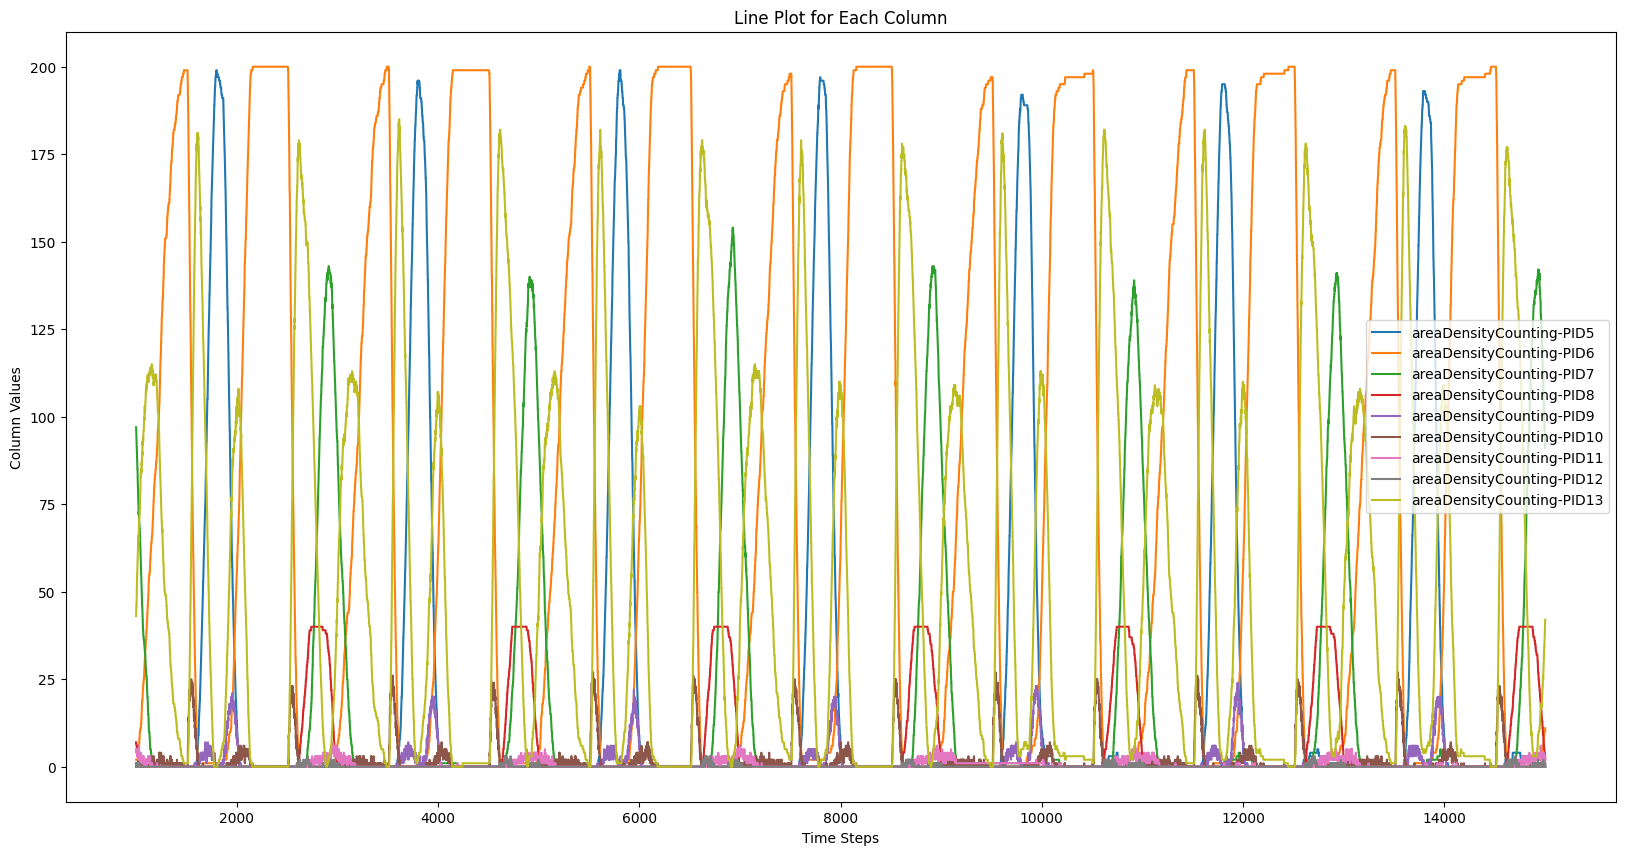

In [3]:
fig = plt.figure(figsize=(20,10))
for column in data.columns[1:]:
    plt.plot(data['timeStep'], data[column], label=column)

plt.xlabel('Time Steps')
plt.ylabel('Column Values')
plt.title('Line Plot for Each Column')
plt.legend()

In [4]:
def create_delay_embedding(data, delay):
    n_rows = len(data) - delay
    embedded_data = np.zeros((n_rows, (delay + 1)*3))

    for i in range(n_rows):
        embedded_data[i] = data.iloc[i:i + delay + 1,1:4].values.flatten()

    return embedded_data

Part 5.1

In [5]:
window_matrix = create_delay_embedding(data,351)
window_matrix.shape

(13650, 1056)

In [7]:
pca = PCA(n_components=3)  # Adjust the number of components if necessary
pca_result = pca.fit_transform(window_matrix)
pca_result.shape

(13650, 3)

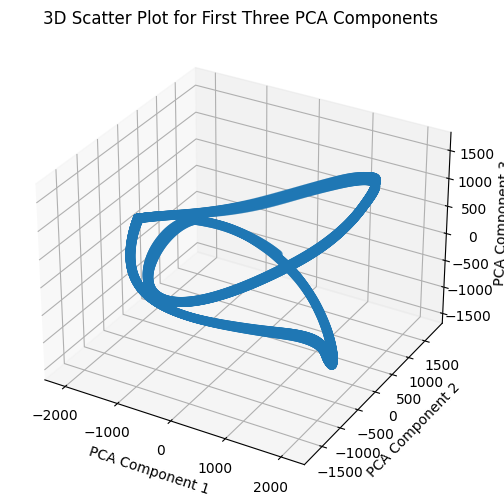

In [8]:
# prepare
x_original = window_matrix[:, :9]  
X_pca = pca_result

# 3D scatter plot for the first three PCA components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D Scatter Plot for First Three PCA Components')
plt.show()


Part 5.2

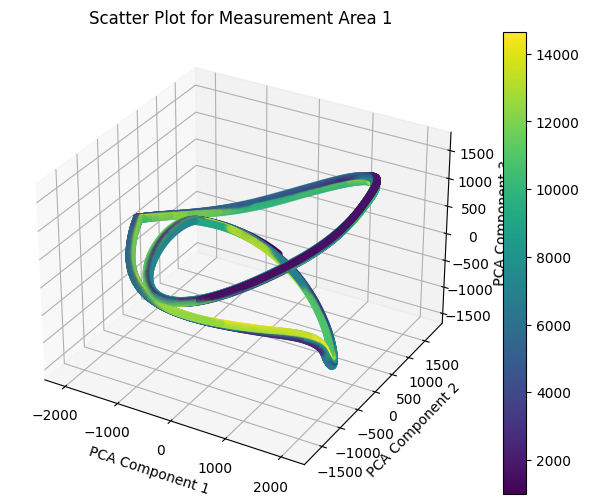

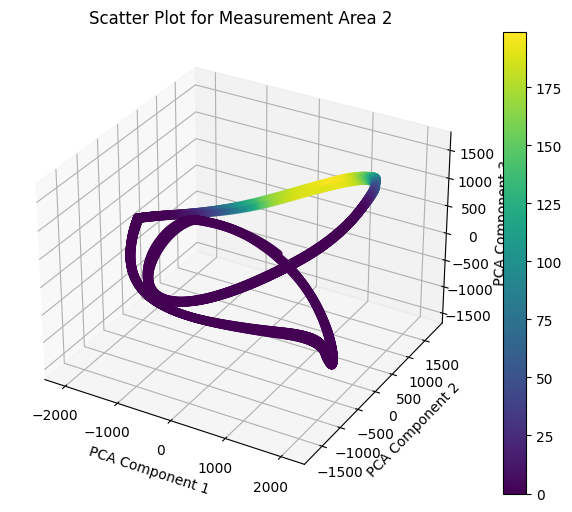

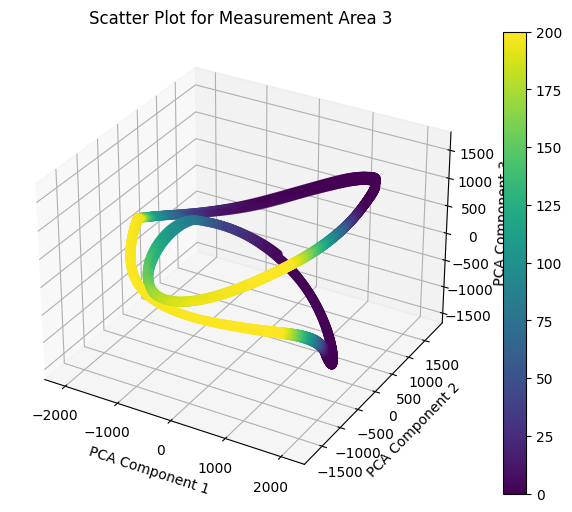

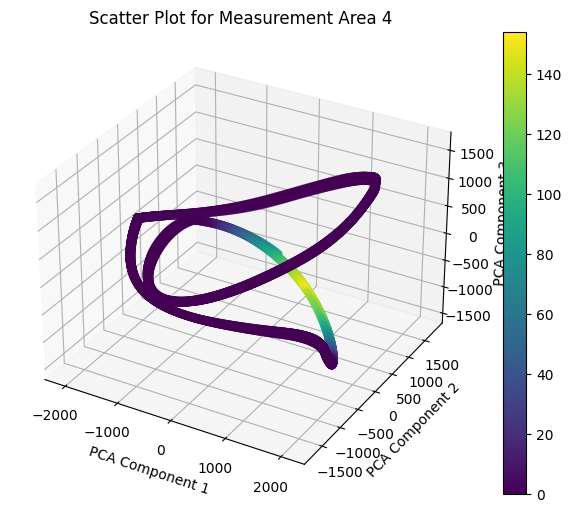

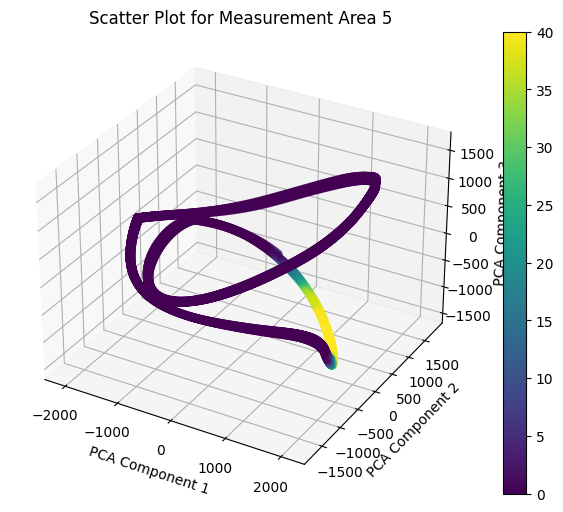

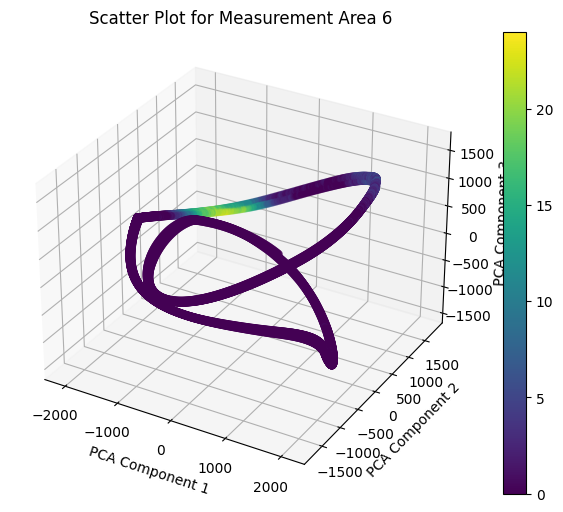

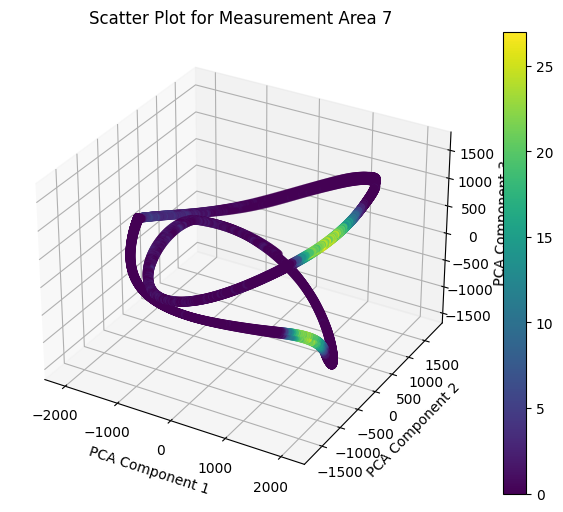

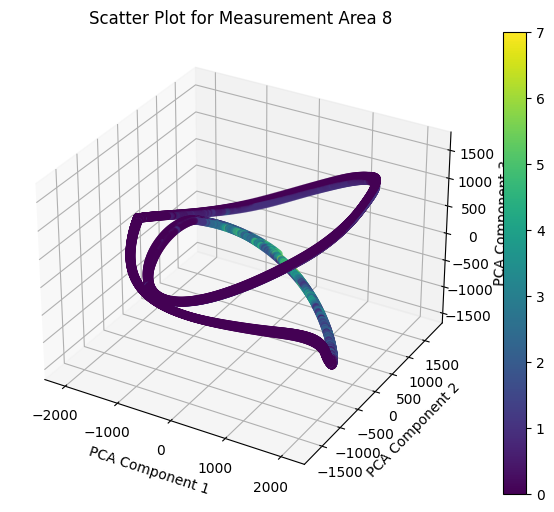

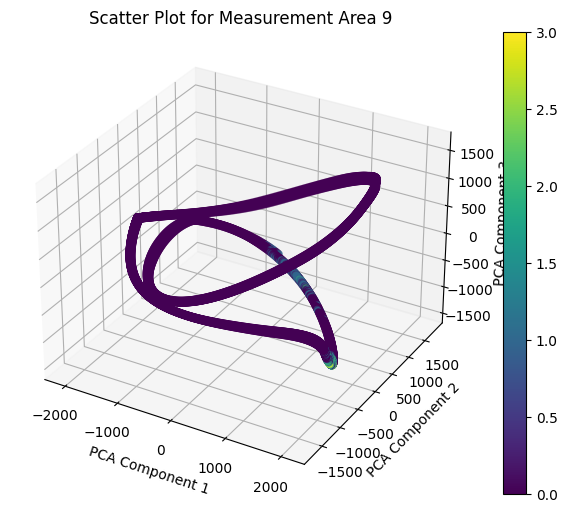

In [9]:
for i in range(9):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Adjust the scatter plot with three components (x, y, z)
    scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=data.iloc[:len(pca_result), i])
    
    plt.colorbar(scatter)
    ax.set_title(f'Scatter Plot for Measurement Area {i+1}')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')

    plt.show()


Part 5.3

In [58]:
import numpy as np

# Assuming pca_transformed_data is ordered according to the time series
# Calculate the distances (deltas) between consecutive points
deltas = np.diff(pca_transformed_data, axis=0)

# Calculate the arclength between consecutive points (Euclidean distance)
arclengths = np.linalg.norm(deltas, axis=1)

# Compute the total arclength at each point
total_arclength = np.cumsum(arclengths)

# Assuming 'times' is the array of time steps corresponding to pca_transformed_data points
time_deltas = np.diff(times)

# Compute the velocity: change in arclength over change in time
velocities = arclengths / time_deltas

# Plotting velocity against total arclength
plt.figure(figsize=(10, 6))
plt.plot(total_arclength, velocities)
plt.xlabel('Arc length of the curve')
plt.ylabel('Velocity on arclength')
plt.title('Velocity as a Function of Arc Length in PCA Space')
plt.show()


NameError: name 'times' is not defined